In [2]:
from google.colab import files

# This opens a file picker — choose the CSV file you downloaded from Kaggle
uploaded = files.upload()


Saving Telco_customer_churn.xlsx to Telco_customer_churn.xlsx


In [5]:
# These are usually pre-installed in Colab, but you can run this just in case
!pip install pandas numpy matplotlib seaborn scikit-learn


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
!pip install openpyxl


In [12]:
import pandas as pd

# Load the Excel file (Colab stores uploads in /content/)
df = pd.read_excel("Telco_customer_churn.xlsx", engine='openpyxl')

# Show the first 5 rows
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [13]:
# Save as CSV
df.to_csv("telco_churn.csv", index=False)


In [14]:
df = pd.read_csv("telco_churn.csv")


In [15]:
# Data types and nulls
df.info()

# Summary of numerical columns
df.describe()

# Count of unique values per column (for categorical exploration)
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,0
CustomerID,7043
Count,1
Country,1
State,1
City,1129
Zip Code,1652
Lat Long,1652
Latitude,1652
Longitude,1651
Gender,2


In [16]:
# Drop columns with:
# - Single unique value
# - High missing values
# - ID/location info

cols_to_drop = [
    'CustomerID', 'Count', 'Country', 'State', 'City',
    'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
    'Churn Label', 'Churn Reason'
]

df.drop(columns=cols_to_drop, inplace=True)


In [17]:
# Fix Total Charges column
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop rows where conversion failed
df = df[df['Total Charges'].notnull()].reset_index(drop=True)



In [18]:
# Identify object columns (categorical)
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols


['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [19]:
# One-hot encoding (drop_first=True to avoid multicollinearity)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [20]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [21]:
print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (7032, 33)


,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,-1.239504,-0.363923,-0.959649,1,86,3239,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,-1.239504,0.196178,-0.940457,1,67,2701,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
2,-0.995040,1.158489,-0.645369,1,86,5372,False,False,False,True,...,False,True,False,True,False,False,True,False,True,False
3,-0.180161,1.329677,0.336516,1,84,5003,False,False,True,True,...,False,True,False,True,False,False,True,False,True,False
4,0.675462,1.293113,1.214589,1,89,5340,True,False,False,True,...,False,True,False,True,False,False,True,False,False,False


In [22]:
# Features (X) and Target (y)
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']


In [23]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9125799573560768

Confusion Matrix:
 [[967  66]
 [ 57 317]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1033
           1       0.83      0.85      0.84       374

    accuracy                           0.91      1407
   macro avg       0.89      0.89      0.89      1407
weighted avg       0.91      0.91      0.91      1407



In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)


In [27]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9339019189765458

Confusion Matrix:
 [[990  43]
 [ 50 324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1033
           1       0.88      0.87      0.87       374

    accuracy                           0.93      1407
   macro avg       0.92      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407



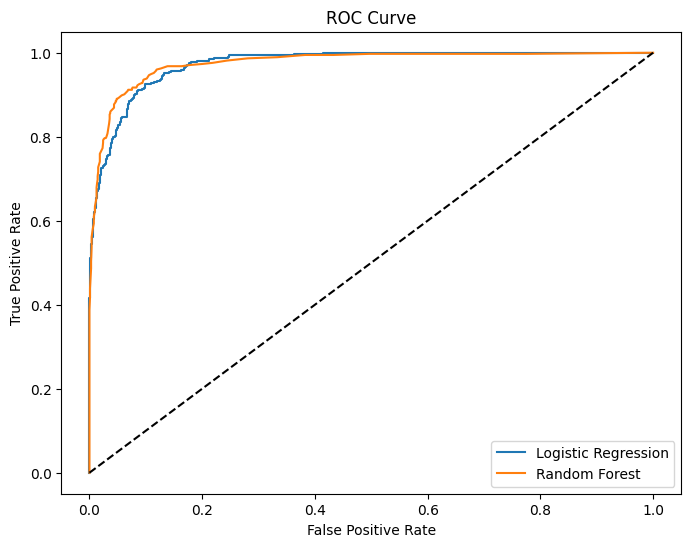

AUC - Logistic Regression: 0.9732801507472654
AUC - Random Forest: 0.9753896806456456


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_probs_lr = lr.predict_proba(X_test)[:, 1]
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# AUC Scores
print("AUC - Logistic Regression:", roc_auc_score(y_test, y_probs_lr))
print("AUC - Random Forest:", roc_auc_score(y_test, y_probs_rf))


In [29]:
import pickle

# Save model
with open("churn_model.pkl", "wb") as f:
    pickle.dump(rf, f)


In [30]:
from google.colab import files
files.download("churn_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

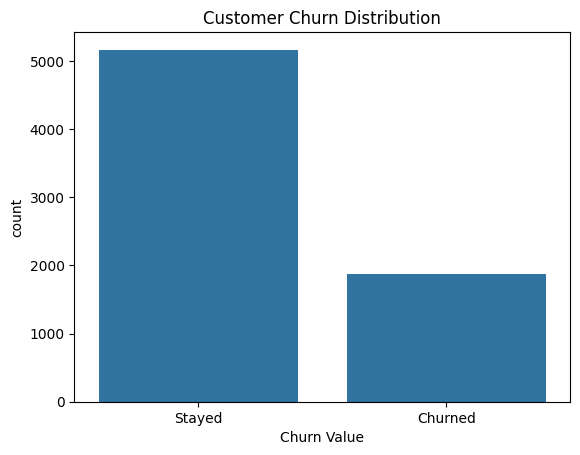

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Value', data=df)
plt.title('Customer Churn Distribution')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()


In [33]:
df_grouped = df.copy()
df_grouped['Contract'] = df_grouped[['Contract_One year', 'Contract_Two year']].idxmax(axis=1)
df_grouped['Contract'] = df_grouped['Contract'].replace({
    'Contract_One year': 'One year',
    'Contract_Two year': 'Two year'
}).fillna('Month-to-month')

churn_by_contract = df_grouped.groupby('Contract')['Churn Value'].mean()
print(churn_by_contract)


Contract
One year    0.340565
Two year    0.028487
Name: Churn Value, dtype: float64


In [35]:
# Check value counts (how many are senior citizens)
print(df['Senior Citizen_Yes'].value_counts())

# Group by Senior Citizen status and calculate churn rate
churn_by_senior = df.groupby('Senior Citizen_Yes')['Churn Value'].mean()
print(churn_by_senior)



Senior Citizen_Yes
False    5890
True     1142
Name: count, dtype: int64
Senior Citizen_Yes
False    0.236503
True     0.416813
Name: Churn Value, dtype: float64


In [36]:
contract_cols = ['Contract_One year', 'Contract_Two year']
df_contract = df.copy()

# Reconstruct original contract column
df_contract['Contract'] = df_contract[contract_cols].idxmax(axis=1)
df_contract['Contract'] = df_contract['Contract'].replace({
    'Contract_One year': 'One year',
    'Contract_Two year': 'Two year'
}).fillna('Month-to-month')

# Churn rate by contract
contract_churn = df_contract.groupby('Contract')['Churn Value'].mean()
print(contract_churn)


Contract
One year    0.340565
Two year    0.028487
Name: Churn Value, dtype: float64


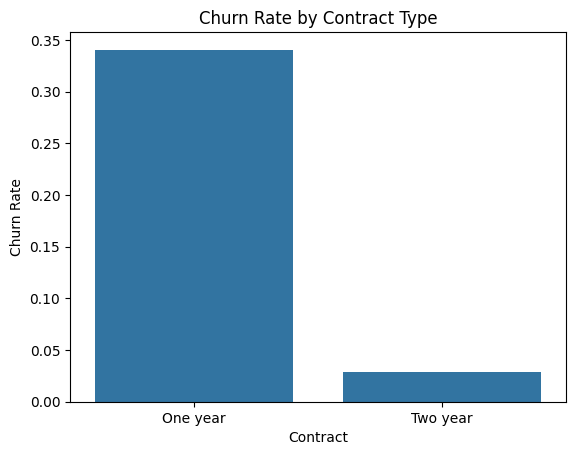

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


In [38]:
tech_support_churn = df.groupby('Tech Support_Yes')['Churn Value'].mean()
print(tech_support_churn)


Tech Support_Yes
False    0.312300
True     0.151961
Name: Churn Value, dtype: float64


In [39]:
security_churn = df.groupby('Online Security_Yes')['Churn Value'].mean()
print(security_churn)


Online Security_Yes
False    0.313733
True     0.146402
Name: Churn Value, dtype: float64


In [40]:
partner_churn = df.groupby('Partner_Yes')['Churn Value'].mean()
print(partner_churn)


Partner_Yes
False    0.329761
True     0.197171
Name: Churn Value, dtype: float64


In [41]:
payment_cols = [col for col in df.columns if col.startswith('Payment Method_')]
df_payment = df.copy()
df_payment['Payment Method'] = df_payment[payment_cols].idxmax(axis=1).str.replace('Payment Method_', '')

# Churn by payment method
payment_churn = df_payment.groupby('Payment Method')['Churn Value'].mean()
print(payment_churn)


Payment Method
Credit card (automatic)    0.159974
Electronic check           0.452854
Mailed check               0.192020
Name: Churn Value, dtype: float64


In [42]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
with open('churn_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Get feature importances
importances = model.feature_importances_
feature_names = model.feature_names_in_

# Create DataFrame
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(5)


<ipython-input-43-83fd938bbc44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


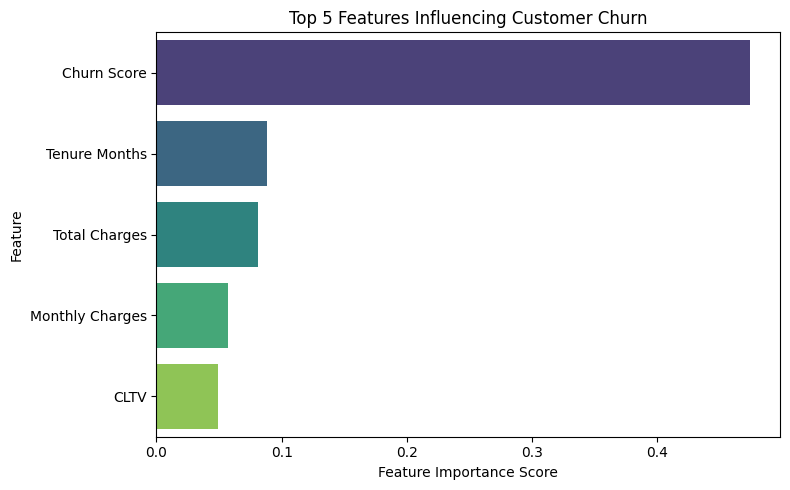

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 5 Features Influencing Customer Churn')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
